# Gaussian pulse

In [1]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src

# import libraries
import numpy as np
from typing import Dict, Any
import matplotlib.pyplot as plt
import scienceplots

from src.physics.pulses import GaussianPulse1D, GaussianPulse2D,  format_value

plt.style.use(['science', 'notebook'])
plt.style.use('dark_background')
# plt.rcParams.update({'figure.dpi': '200'})

In [2]:
def gaussian(x, x0, sigma):
    return np.exp(-(x - x0)**2 / (4*sigma**2))

### In Wavelenght
---

In [3]:
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

sigma_wavelength = input_width_wl / (2*np.sqrt(2*np.log(2)))  # 18.70 (nm)
times = 6
steps = 500
wavelength = np.linspace(fundamental_wavelength - times*sigma_wavelength, fundamental_wavelength + times*sigma_wavelength, steps)
A_input_beam = gaussian(wavelength, fundamental_wavelength, sigma_wavelength)
I_input_beam = np.abs(A_input_beam)**2

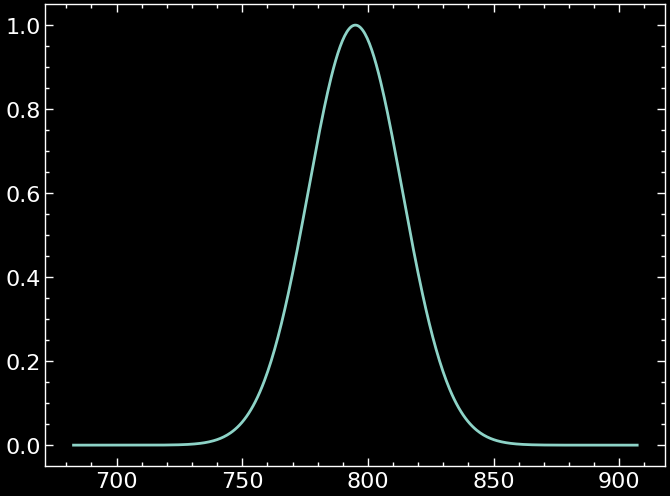

FWHM in wavelength: 43.59 nm


In [4]:
plt.plot(wavelength*1e9, I_input_beam)
plt.show()

# FWHM in wavelength
index = np.where(I_input_beam >= 0.5)[0]
FWHM_wl = (wavelength[index[-1]] - wavelength[index[0]]) * 1e9
print(f"FWHM in wavelength: {FWHM_wl:.2f} nm")

### In frecuency
---

In [5]:
# Parameters in frequency
c = 299792458  # (m/s)
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

times_f = 5
omega = np.linspace(fundamental_frequency - times_f*sigma_frequency, fundamental_frequency + times_f*sigma_frequency, steps)
A_input_frequency_beam = gaussian(omega, fundamental_frequency, sigma_frequency)
I_input_frequency = np.abs(A_input_frequency_beam)

In [6]:
index_f = np.where(I_input_frequency >= 0.5)[0]
FWHM_f = (omega[index_f[-1]] - omega[index_f[0]])  
print(f"FWHM in frequency: {FWHM_f*1e-12:.2f} PHz")

FWHM in frequency: 184.14 PHz


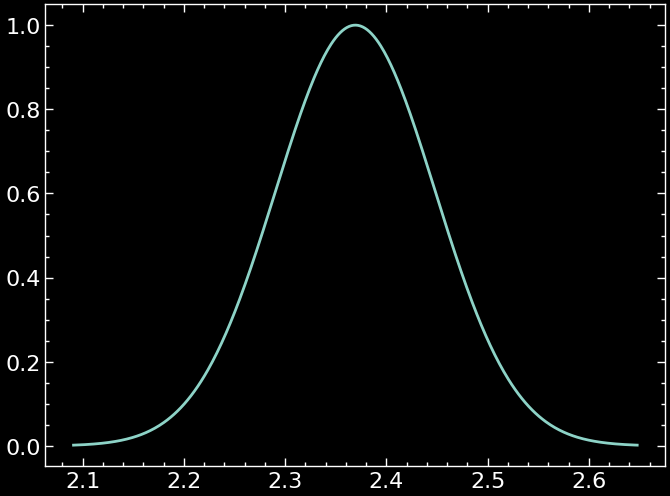

In [7]:
plt.plot(omega*1e-15, I_input_frequency)
plt.show()

# Class test
---

In [8]:
from typing import Optional, Tuple, Dict, Any
import numpy as np
import numpy.typing as npt

# [Código de la clase GaussianPulse1D como en la última iteración]

def run_tests():
    print("=== Pruebas de GaussianPulse1D ===")
    
    # Prueba 1: Inicialización con FWHM
    print("\nPrueba 1: Inicialización con FWHM=2")
    try:
        pulse = GaussianPulse1D(x0=0, FWHM=2, steps=1000)
        print(f"Parámetros: {pulse.as_dict()}")
    except Exception as e:
        print(f"Error: {e}")

    # Prueba 2: Inicialización con std
    print("\nPrueba 2: Inicialización con std=0.8493218")
    try:
        pulse = GaussianPulse1D(x0=0, std=0.8493218, steps=1000)
        print(f"Parámetros: {pulse.as_dict()}")
    except Exception as e:
        print(f"Error: {e}")

    # Prueba 4: Generación de pulso (normalizado y no normalizado)
    print("\nPrueba 4: Generación de pulso")
    pulse = GaussianPulse1D(x0=0, FWHM=2, steps=1000)
    x, y_norm = pulse.generate_pulse(normalization=True)
    print(f"Pulso normalizado (máximo): {np.max(y_norm):.4f}")
    x, y_unnorm = pulse.generate_pulse(normalization=False)
    print(f"Pulso no normalizado (máximo): {np.max(y_unnorm):.4f}")
    # Verificar caché
    x, y_cached = pulse.generate_pulse(normalization=True)
    print(f"Pulso normalizado (máximo, desde caché): {np.max(y_cached):.4f}")

    # Prueba 5: Generación de intensidad
    print("\nPrueba 5: Generación de intensidad")
    x, intensity = pulse.generate_intensity(normalization=True)
    print(f"Intensidad normalizada (máximo): {np.max(intensity):.4f}")
    x, intensity_cached = pulse.generate_intensity(normalization=True)
    print(f"Intensidad normalizada (máximo, desde caché): {np.max(intensity_cached):.4f}")

    # Prueba 6: Cálculo de FWHM
    print("\nPrueba 6: Cálculo de FWHM")
    fwhm_pulse = pulse.computed_FWHM(who='pulse', normalization=True)
    fwhm_intensity = pulse.computed_FWHM(who='intensity', normalization=True)
    print(f"FWHM (pulse): {fwhm_pulse:.4f}, FWHM (intensity): {fwhm_intensity:.4f}")

    # Prueba 7: Dominio personalizado
    print("\nPrueba 7: Dominio personalizado")
    custom_x = np.linspace(-2, 2, 500)
    pulse_custom = GaussianPulse1D(x0=0, FWHM=2, x_values=custom_x)
    x, y_custom = pulse_custom.generate_pulse(normalization=True)
    print(f"Dominio personalizado: min(x)={x.min():.4f}, max(x)={x.max():.4f}, max(y)={y_custom.max():.4f}")

    # Prueba 8: Dominio asimétrico
    print("\nPrueba 8: Dominio asimétrico")
    pulse_asym = GaussianPulse1D(x0=0, FWHM=2, steps=1000)
    x_asym = pulse_asym.gaussian_domain(left_std=3, right_std=7)
    print(f"Dominio asimétrico: min(x)={x_asym.min():.4f}, max(x)={x_asym.max():.4f}")

if __name__ == "__main__":
    run_tests()

=== Pruebas de GaussianPulse1D ===

Prueba 1: Inicialización con FWHM=2
Parámetros: {'center': 0, 'FWHM': 2, 'sigma': np.float64(0.8493218002880191), 'steps': 1000, 'domain_width_std': 5, 'computed_FWHM': 2.0000211507821275}

Prueba 2: Inicialización con std=0.8493218
Parámetros: {'center': 0, 'FWHM': None, 'sigma': 0.8493218, 'steps': 1000, 'domain_width_std': 5, 'computed_FWHM': 2.000021150103888}

Prueba 4: Generación de pulso
Pulso normalizado (máximo): 0.4697
Pulso no normalizado (máximo): 1.0000
Pulso normalizado (máximo, desde caché): 0.4697

Prueba 5: Generación de intensidad
Intensidad normalizada (máximo): 0.2206
--- Using cached intensity data ---
Intensidad normalizada (máximo, desde caché): 0.2206

Prueba 6: Cálculo de FWHM
--- Using cached intensity data ---
FWHM (pulse): 2.0000, FWHM (intensity): 1.4142

Prueba 7: Dominio personalizado
Dominio personalizado: min(x)=-2.0000, max(x)=2.0000, max(y)=0.4697

Prueba 8: Dominio asimétrico
Dominio asimétrico: min(x)=-2.5480, max

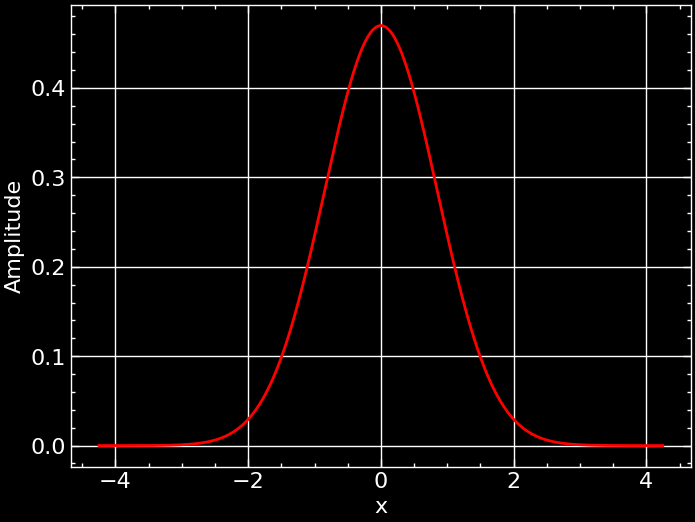

In [9]:
pulse = GaussianPulse1D(x0=0, FWHM=2, steps=1000)
pulse.plot(who='pulse', normalization=True)
plt.show()

In [10]:
# Input beam parameters | Longitud de onda central central y FWHM
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

input_pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=input_width_wl, steps=1000)

# With normalization
wavelenght, A_wavelenght_norm = input_pulse.generate_pulse(normalization=True)  # Pulse itself
wavelenght, I_wavelenght_norm = input_pulse.generate_intensity(normalization=True)  # Intensity of the pulse

# Without normalizatiion
wavelenght, A_wavelenght = input_pulse.generate_pulse(normalization=True)  # Pulse itself
wavelenght, I_wavelenght = input_pulse.generate_intensity(normalization=True)  # Intensity of the pulse

# Obtener el diccionario con los parámetros del pulso
pulse_dict = input_pulse.as_dict()
for key, value in pulse_dict.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")


--- Using cached intensity data ---
Center: 7.95e-07
Fwhm: 4.40e-08
Sigma: 1.87e-08
Steps: 1000
Domain Width Std: 5
Computed Fwhm: 4.40e-08


In [11]:
def test_pulse_with_wavelength_params():
    print("=== Prueba de GaussianPulse1D con parámetros de longitud de onda ===")
    
    # Parámetros de entrada
    FWHM_wl = 44e-9  # m (FWHM en longitud de onda)
    fundamental_wavelength = 795e-9  # m (longitud de onda fundamental, centro del pulso)
    
    print(f"FWHM espacial: {FWHM_wl:.4e} m")
    print(f"Longitud de onda fundamental (centro): {fundamental_wavelength:.4e} m")
    
    # Inicialización del pulso
    print("\nInicialización del pulso")
    try:
        pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=FWHM_wl, steps=1000, domain_width_std=5)
        print(f"Parámetros: {pulse.as_dict()}")
    except Exception as e:
        print(f"Error: {e}")
    
    # Generación del pulso
    print("\nGeneración del pulso")
    x, y_norm = pulse.generate_pulse(normalization=True)
    print(f"Pulso normalizado (máximo): {np.max(y_norm):.4e}")
    x, y_unnorm = pulse.generate_pulse(normalization=False)
    print(f"Pulso no normalizado (máximo): {np.max(y_unnorm):.4f}")
    
    # Generación de intensidad
    print("\nGeneración de intensidad")
    x, intensity = pulse.generate_intensity(normalization=True)
    print(f"Intensidad normalizada (máximo): {np.max(intensity):.4e}")
    
    # Cálculo de FWHM
    print("\nCálculo de FWHM")
    fwhm_pulse = pulse.computed_FWHM(who='pulse', normalization=True)
    fwhm_intensity = pulse.computed_FWHM(who='intensity', normalization=True)
    print(f"FWHM (pulse): {fwhm_pulse:.4e} m, FWHM (intensity): {fwhm_intensity:.4e} m")

if __name__ == "__main__":
    test_pulse_with_wavelength_params()

=== Prueba de GaussianPulse1D con parámetros de longitud de onda ===
FWHM espacial: 4.4000e-08 m
Longitud de onda fundamental (centro): 7.9500e-07 m

Inicialización del pulso
Parámetros: {'center': 7.95e-07, 'FWHM': 4.4e-08, 'sigma': np.float64(1.868507960633642e-08), 'steps': 1000, 'domain_width_std': 5, 'computed_FWHM': 4.400060477834513e-08}

Generación del pulso
Pulso normalizado (máximo): 2.1351e+07
Pulso no normalizado (máximo): 1.0000

Generación de intensidad
Intensidad normalizada (máximo): 4.5585e+14

Cálculo de FWHM
--- Using cached intensity data ---
FWHM (pulse): 4.4001e-08 m, FWHM (intensity): 3.1113e-08 m


In [12]:
def test_pulse_with_frequency_params():
    print("=== Prueba de GaussianPulse1D en dominio de frecuencia (rad/s) ===")
    
    # Parámetros de entrada
    FWHM_wl = 44e-9  # m (FWHM en longitud de onda)
    fundamental_wavelength = 795e-9  # m (longitud de onda fundamental)
    c = 299792458  # m/s (velocidad de la luz)
    sigma_lambda = 1.8685e-8  # m (de tu salida anterior)
    
    # Calcular parámetros en frecuencia angular
    omega_0 = (2 * np.pi * c) / fundamental_wavelength  # rad/s
    sigma_omega = (2 * np.pi * c) / (fundamental_wavelength ** 2) * sigma_lambda  # rad/s
    FWHM_omega = sigma_omega * 2 * np.sqrt(2 * np.log(2))  # rad/s
    
    print(f"Frecuencia central: {omega_0:.4e} rad/s")
    print(f"FWHM en frecuencia: {FWHM_omega:.4e} rad/s")
    
    # Inicialización del pulso
    print("\nInicialización del pulso")
    try:
        pulse = GaussianPulse1D(x0=omega_0, FWHM=FWHM_omega, steps=1000, domain_width_std=5)
        print(f"Parámetros: {pulse.as_dict()}")
    except Exception as e:
        print(f"Error: {e}")
    
    # Generación del pulso
    print("\nGeneración del pulso")
    x, y_norm = pulse.generate_pulse(normalization=True)
    print(f"Pulso normalizado (máximo): {np.max(y_norm):.4e} s")
    x, y_unnorm = pulse.generate_pulse(normalization=False)
    print(f"Pulso no normalizado (máximo): {np.max(y_unnorm):.4f}")
    
    # Generación de intensidad
    print("\nGeneración de intensidad")
    x, intensity = pulse.generate_intensity(normalization=True)
    print(f"Intensidad normalizada (máximo): {np.max(intensity):.4e} s^2")
    
    # Cálculo de FWHM
    print("\nCálculo de FWHM")
    fwhm_pulse = pulse.computed_FWHM(who='pulse', normalization=True)
    fwhm_intensity = pulse.computed_FWHM(who='intensity', normalization=True)
    print(f"FWHM (pulse): {fwhm_pulse:.4e} rad/s, FWHM (intensity): {fwhm_intensity:.4e} rad/s")

if __name__ == "__main__":
    test_pulse_with_frequency_params()

=== Prueba de GaussianPulse1D en dominio de frecuencia (rad/s) ===
Frecuencia central: 2.3694e+15 rad/s
FWHM en frecuencia: 1.3113e+14 rad/s

Inicialización del pulso
Parámetros: {'center': 2369373040640067.0, 'FWHM': np.float64(131134552992223.47), 'sigma': np.float64(55687717313659.94), 'steps': 1000, 'domain_width_std': 5, 'computed_FWHM': 131135939791403.0}

Generación del pulso
Pulso normalizado (máximo): 7.1638e-15 s
Pulso no normalizado (máximo): 1.0000

Generación de intensidad
Intensidad normalizada (máximo): 5.1320e-29 s^2

Cálculo de FWHM
--- Using cached intensity data ---
FWHM (pulse): 1.3114e+14 rad/s, FWHM (intensity): 9.2728e+13 rad/s


# Bidimensional Gaussian pulse
---

In [13]:
def gaussian_2D(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-((x - x0)**2 / (2*sigma_x**2) + (y - y0)**2 / (2*sigma_y**2)))

In [14]:
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

sigma_wavelength = input_width_wl / (2*np.sqrt(2*np.log(2)))  # 18.70 (nm)

x_lambda = np.linspace(fundamental_wavelength - 8*sigma_wavelength, fundamental_wavelength + 8*sigma_wavelength, 200)
y_lambda = np.linspace(fundamental_wavelength - 8*sigma_wavelength, fundamental_wavelength + 8*sigma_wavelength, 200)
x, y = np.meshgrid(x_lambda, y_lambda)
z = gaussian_2D(x=x , y=y, x0=fundamental_wavelength, y0=fundamental_wavelength, sigma_x=sigma_wavelength, sigma_y=sigma_wavelength)


In [15]:
# test the GaussianPulse2D class
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

# Create an instance of the GaussianPulse2D class
input_pulse_2D = GaussianPulse2D(x0=fundamental_wavelength, y0=fundamental_wavelength, FWHM_x=input_width_wl, FWHM_y=input_width_wl, steps=1000)
X_data, Y_data, Z_data = input_pulse_2D.generate_pulse(range_multiplier=8)

--- Generating pulse with range_multiplier=8 ---


In [16]:
# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_2D.as_dict()
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

--- Computing FWHM ---
--- Generating pulse with range_multiplier=5.0 ---
Center: (7.95e-07, 7.95e-07)
Fwhm Input: (4.4e-08, 4.4e-08)
Sigma: (np.float64(1.868507960633642e-08), np.float64(1.868507960633642e-08))
Steps: 1000
Computed Fwhm: (np.float64(4.3953890965856366e-08), np.float64(4.3953890965856366e-08))


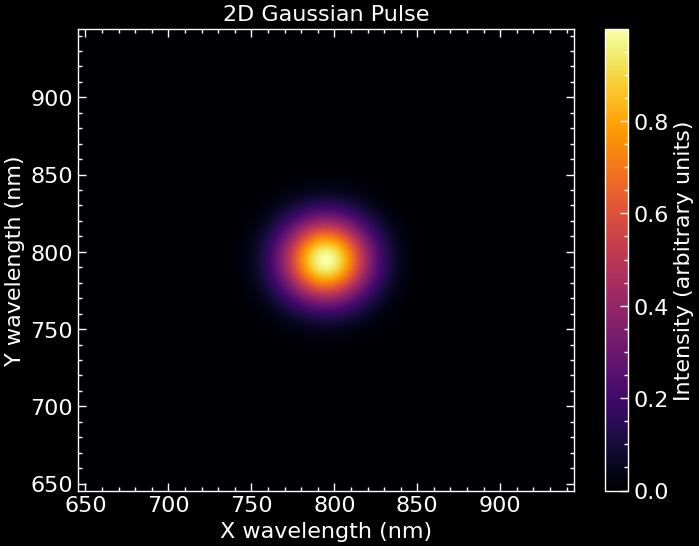

In [17]:
scale_factor = 1e9  # (m) to (nm) 

# 4. Calcular el 'extent' para imshow usando los valores min/max de las mallas X e Y
# imshow necesita (izquierda, derecha, abajo, arriba)
extent_values = (X_data.min() * scale_factor,
                 X_data.max() * scale_factor,
                 Y_data.min() * scale_factor,
                 Y_data.max() * scale_factor)

# 5. Plotear el pulso 2D
plt.figure()
plt.imshow(Z_data,
           cmap='inferno',
           extent=extent_values, 
           aspect='auto',
           origin='lower') # Importante para asegurar que el origen (0,0) esté en la parte inferior izquierda

plt.colorbar(label='Intensity (arbitrary units)')
plt.xlabel(f'X wavelength (nm)') 
plt.ylabel(f'Y wavelength (nm)')
plt.title('2D Gaussian Pulse') 

plt.show()